In [7]:
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings("ignore")
import intake
import sectionate
import xarray as xr
import numpy as np
import matplotlib.pylab as plt

In [9]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [10]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', variable_id=['uo','vo','tos'])
#variable_id: uo=eastward_sea_water_velocity, vo=northward_sea_water_velocity, wo=upward_sea_water_velocity
dog.df

activity_id institution_id source_id experiment_id member_id table_id  \
0        CMIP      NOAA-GFDL  GFDL-CM4    historical  r1i1p1f1     Oday   
1        CMIP      NOAA-GFDL  GFDL-CM4    historical  r1i1p1f1     Oday   
2        CMIP      NOAA-GFDL  GFDL-CM4    historical  r1i1p1f1     Omon   
3        CMIP      NOAA-GFDL  GFDL-CM4    historical  r1i1p1f1     Omon   
4        CMIP      NOAA-GFDL  GFDL-CM4    historical  r1i1p1f1     Omon   
5        CMIP      NOAA-GFDL  GFDL-CM4    historical  r1i1p1f1     Omon   

  variable_id grid_label                                             zstore  \
0         tos         gn  gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...   
1         tos         gr  gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...   
2         tos         gn  gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...   
3         tos         gr  gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...   
4          uo         gn  gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...   
5          vo         gn  gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...   

   dcpp_init_year  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
5             NaN

In [11]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())

Dataset(s):   0%|                                        | 0/4 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|████████████████████████████████| 4/4 [00:01<00:00,  2.02it/s]


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Oday.gr',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Oday.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

* Renamed what I usually call CM4_hist, grid

In [12]:
grid = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
grid

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, vertex: 4, x: 1440, y: 1080)
Coordinates:
    lat_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lon_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * bnds       (bnds) float64 1.0 2.0
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * member_id  (member_id) <U8 'r1i1p1f1'
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Dimensions without coordinates: vertex
Data variables:
    tos        (member_id, time, y, x) float32 dask.array<chunksize=(1, 12, 1080, 1440), meta=np.ndarray>
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    realm:                   ocean
    product:                 model-output
    source_type:             AOGCM
    references:              see further_info_url attribute
    variant_label:           r1i1p1f1
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    frequency:               mon
    table_id:                Omon
    parent_activity_id:      CMIP
    mip_era:                 CMIP6
    grid_label:              gn
    source_id:               GFDL-CM4
    external_variables:      areacello
    contact:                 gfdl.climate.model.info@noaa.gov
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    experiment_id:           historical
    variant_info:            N/A
    parent_experiment_id:    piControl
    forcing_index:           1
    sub_experiment_id:       none
    creation_date:           2019-02-24T07:42:16Z
    initialization_index:    1
    data_specs_version:      01.00.27
    activity_id:             CMIP
    parent_source_id:        GFDL-CM4
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    status:                  2019-08-06;created;by nhn2@columbia.edu
    realization_index:       1
    experiment:              historical
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    institution_id:          NOAA-GFDL
    sub_experiment:          none
    branch_time_in_parent:   36500.0
    branch_method:           standard
    nominal_resolution:      25 km
    intake_esm_varname:      vo
    parent_time_units:       days since 0001-1-1
    branch_time_in_child:    0.0
    institution:             National Oceanic and Atmospheric Administration,...
    variable_id:             vo
    parent_mip_era:          CMIP6
    tracking_id:             hdl:21.14100/9f878dc5-1ff9-4ef2-8f78-6c05e825259...
    history:                 File was processed by fremetar (GFDL analog of C...
    physics_index:           1
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    comment:                 <null ref>
    parent_variant_label:    r1i1p1f1
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

In [13]:
West_section_lats=[-4.9937, -5.4916,]
West_section_lons=[-208.4605, -208.4605]
East_section_lats=[-6.2376, -6.4861]
East_section_lons=[-204.7383, -204.4901]

## Western part

In [15]:
iwest = np.array([])
jwest = np.array([])
xwest = np.array([])
ywest = np.array([])
for k in range(len(West_section_lats)-1):
    isec, jsec, xsec, ysec = sectionate.create_section(grid['lon'], grid['lat'],
                                                       West_section_lons[k], 
                                                       West_section_lats[k], 
                                                       West_section_lons[k+1],
                                                       West_section_lats[k+1], rounding='up', tol=2.)
    iwest = np.concatenate([iwest, isec], axis=0)
    jwest = np.concatenate([jwest, jsec], axis=0)
    xwest = np.concatenate([xwest, xsec], axis=0)
    ywest = np.concatenate([ywest, ysec], axis=0)

KeyboardInterrupt: 

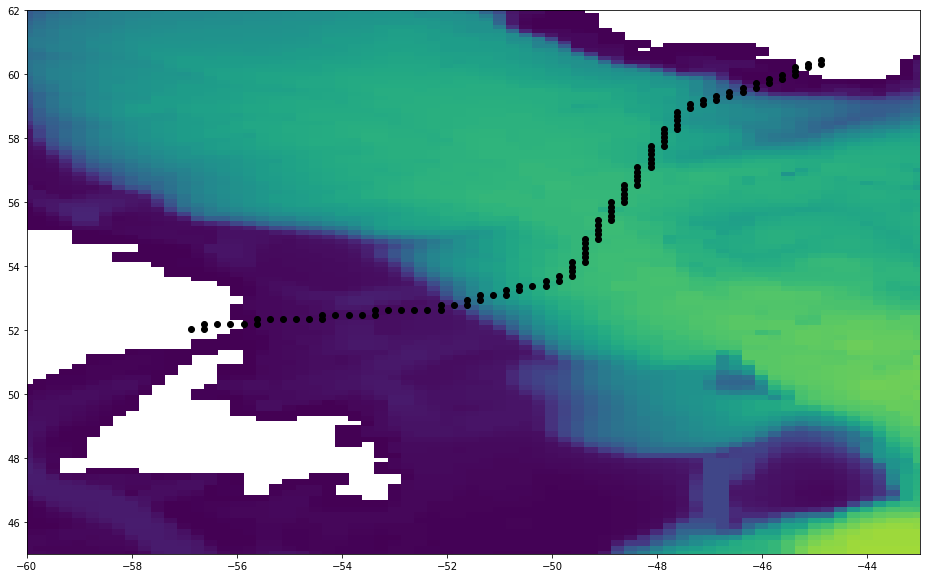

In [7]:
plt.figure(figsize=[16,10])
plt.pcolormesh(grid['geolon_t'], grid['geolat_t'], grid['ht'][1::,1::])
plt.plot(xwest, ywest, 'ko')
plt.axis([-60,-43, 45, 62])
plt.show()

The grid cell indices are then ready to be used to compute the section.

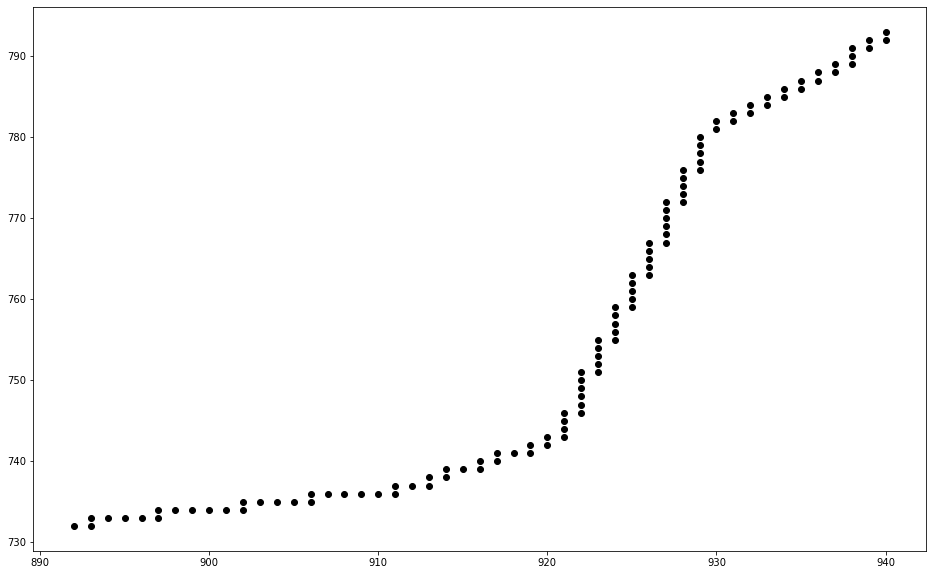

In [8]:
# double check for missing points
plt.figure(figsize=[16,10])
plt.plot(iwest, jwest, 'ko')

Print the i,j and associated lon/lat:

In [9]:
uvpoints = sectionate.transports_C.MOM6_UVpoints_from_section(iwest, jwest)

for point in uvpoints:
    pttype, i, j = point
    i = int(i)
    j = int(j)
    if pttype == 'U':
        lon = grid['geolon_c'].isel(xu_ocean=i, yu_ocean=j).values
        lat = grid['geolat_t'].isel(xt_ocean=i, yt_ocean=j).values
    elif pttype == 'V':
        lon = grid['geolon_t'].isel(xt_ocean=i, yt_ocean=j).values
        lat = grid['geolat_c'].isel(xu_ocean=i, yu_ocean=j).values
    print(f'{point[0]}, {point[1]}, {point[2]}, {lon}, {lat}')

V, 893.0, 732.0, -56.625, 52.10049819946289
U, 893.0, 733.0, -56.5, 52.177284240722656
V, 894.0, 733.0, -56.375, 52.25380325317383
V, 895.0, 733.0, -56.125, 52.25380325317383
V, 896.0, 733.0, -55.875, 52.25380325317383
V, 897.0, 733.0, -55.625, 52.25380325317383
U, 897.0, 734.0, -55.5, 52.330322265625
V, 898.0, 734.0, -55.375, 52.406578063964844
V, 899.0, 734.0, -55.125, 52.406578063964844
V, 900.0, 734.0, -54.875, 52.406578063964844
V, 901.0, 734.0, -54.625, 52.406578063964844
V, 902.0, 734.0, -54.375, 52.406578063964844
U, 902.0, 735.0, -54.25, 52.48283767700195
V, 903.0, 735.0, -54.125, 52.55883026123047
V, 904.0, 735.0, -53.875, 52.55883026123047
V, 905.0, 735.0, -53.625, 52.55883026123047
V, 906.0, 735.0, -53.375, 52.55883026123047
U, 906.0, 736.0, -53.25, 52.634822845458984
V, 907.0, 736.0, -53.125, 52.71055221557617
V, 908.0, 736.0, -52.875, 52.71055221557617
V, 909.0, 736.0, -52.625, 52.71055221557617
V, 910.0, 736.0, -52.375, 52.71055221557617
V, 911.0, 736.0, -52.125, 52.7105

## Eastern part

In [16]:
ieast = np.array([])
jeast = np.array([])
xeast = np.array([])
yeast = np.array([])
for k in range(len(East_section_lats)-1):
    isec, jsec, xsec, ysec = sectionate.create_section(grid['geolon_t'], grid['geolat_t'],
                                                       East_section_lons[k], 
                                                       East_section_lats[k], 
                                                       East_section_lons[k+1],
                                                       East_section_lats[k+1], rounding='up', tol=1.5)
    ieast = np.concatenate([ieast, isec], axis=0)
    jeast = np.concatenate([jeast, jsec], axis=0)
    xeast = np.concatenate([xeast, xsec], axis=0)
    yeast = np.concatenate([yeast, ysec], axis=0)

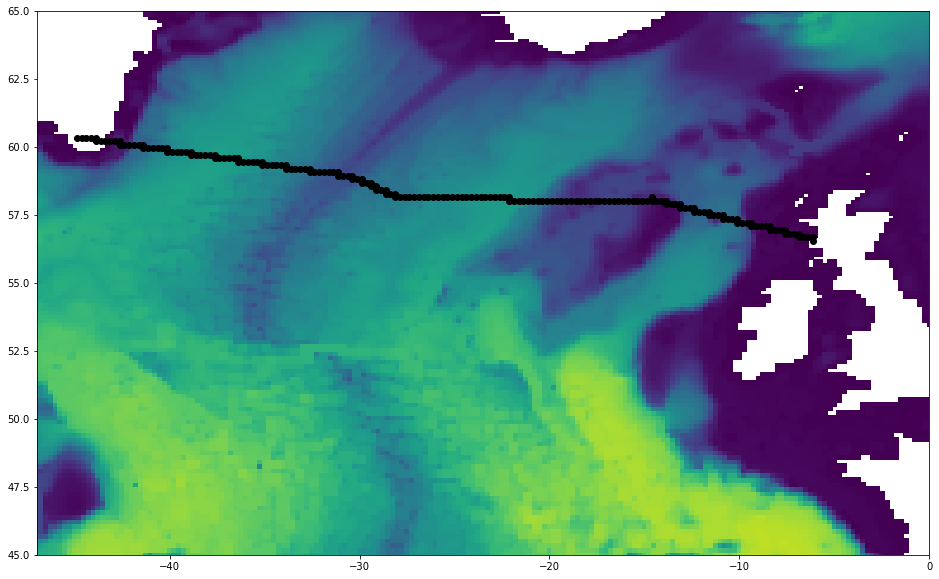

In [17]:
plt.figure(figsize=[16,10])
plt.pcolormesh(grid['geolon_t'], grid['geolat_t'], grid['ht'][1::,1::])
plt.plot(xeast, yeast, 'ko')
plt.axis([-47,-0, 45, 65])
plt.show()

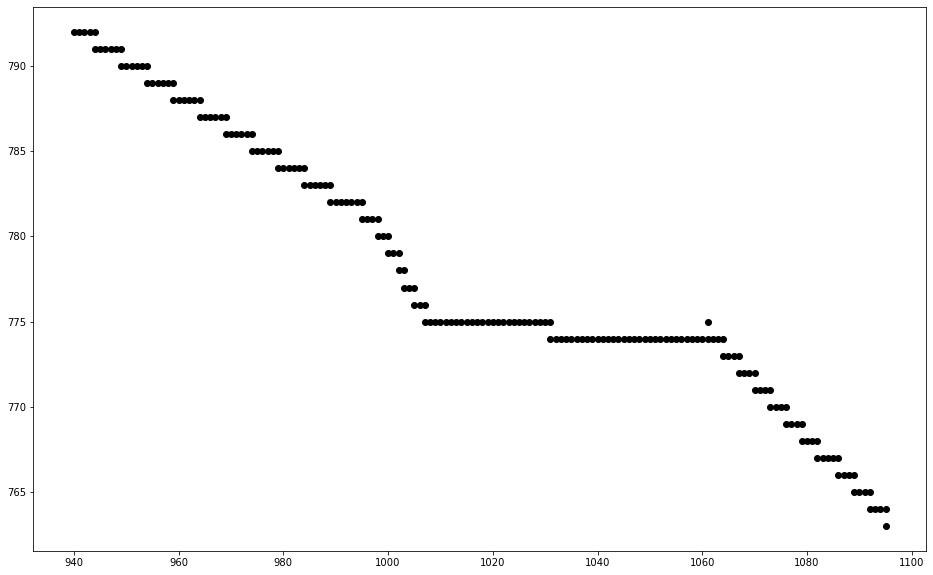

In [18]:
# double check for missing points
plt.figure(figsize=[16,10])
plt.plot(ieast, jeast, 'ko')

In [19]:
uvpoints = sectionate.transports_C.MOM6_UVpoints_from_section(ieast, jeast)

for point in uvpoints:
    pttype, i, j = point
    i = int(i)
    j = int(j)
    if pttype == 'U':
        lon = grid['geolon_c'].isel(xu_ocean=i, yu_ocean=j).values
        lat = grid['geolat_t'].isel(xt_ocean=i, yt_ocean=j).values
    elif pttype == 'V':
        lon = grid['geolon_t'].isel(xt_ocean=i, yt_ocean=j).values
        lat = grid['geolat_c'].isel(xu_ocean=i, yu_ocean=j).values
    print(f'{point[0]}, {point[1]}, {point[2]}, {lon}, {lat}')

V, 941.0, 792.0, -44.625, 60.39453887939453
V, 942.0, 792.0, -44.375, 60.39453887939453
V, 943.0, 792.0, -44.125, 60.39453887939453
V, 944.0, 792.0, -43.875, 60.39453887939453
U, 944.0, 792.0, -43.75, 60.332786560058594
V, 945.0, 791.0, -43.625, 60.27079772949219
V, 946.0, 791.0, -43.375, 60.27079772949219
V, 947.0, 791.0, -43.125, 60.27079772949219
V, 948.0, 791.0, -42.875, 60.27079772949219
V, 949.0, 791.0, -42.625, 60.27079772949219
U, 949.0, 791.0, -42.5, 60.20881271362305
V, 950.0, 790.0, -42.375, 60.14658737182617
V, 951.0, 790.0, -42.125, 60.14658737182617
V, 952.0, 790.0, -41.875, 60.14658737182617
V, 953.0, 790.0, -41.625, 60.14658737182617
V, 954.0, 790.0, -41.375, 60.14658737182617
U, 954.0, 790.0, -41.25, 60.08436584472656
V, 955.0, 789.0, -41.125, 60.021907806396484
V, 956.0, 789.0, -40.875, 60.021907806396484
V, 957.0, 789.0, -40.625, 60.021907806396484
V, 958.0, 789.0, -40.375, 60.021907806396484
V, 959.0, 789.0, -40.125, 60.021907806396484
U, 959.0, 789.0, -40.0, 59.959